# Bank Marketing
#### Classification problem to predict is customer will subscribe term deposit or not
#### Paycom Summer Engagement Proram: Summer 2020
#### Meera Bankar (University of Oklahoma)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools, time
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import explained_variance_score


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC

C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meera\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

## Load data

In [86]:
def getdata(path):
    df =pd.read_csv(path,sep=';')
    return df

Bank_data=getdata("C:/Users/meera/bank-additional/bank-additional/bank-additional-full.csv")
Bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Check missing values and class count

In [3]:

print(Bank_data['y'].value_counts(normalize=True) * 100)
Bank_data.isna().sum(), Bank_data['y'].value_counts()


no     88.734583
yes    11.265417
Name: y, dtype: float64


(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64, no     36548
 yes     4640
 Name: y, dtype: int64)

In [13]:
Bank_data[['education']] = Bank_data[['education']].replace(dict.fromkeys(['basic.4y','basic.6y','basic.9y'], 'Basic_PrimaryorSecondary'))

Bank_data.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic_PrimaryorSecondary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic_PrimaryorSecondary,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Visualisation (Exploratory Data Analysis)

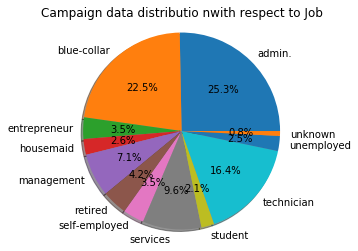

In [4]:
def piplot(data, title):
    labels = data.astype('category').cat.categories.tolist()
    counts = data.value_counts()
    sizes = [counts[i] for i in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.title(title)
    plt.show()

piplot(Bank_data['job'],"Campaign data distributio nwith respect to Job")

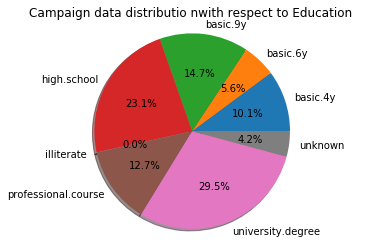

In [5]:
piplot(Bank_data['education'], "Campaign data distributio nwith respect to Education")

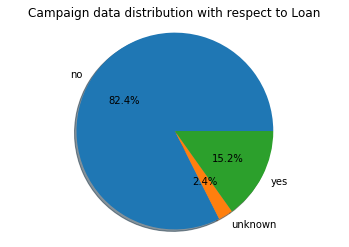

In [6]:
piplot(Bank_data['loan'], "Campaign data distribution with respect to Loan")

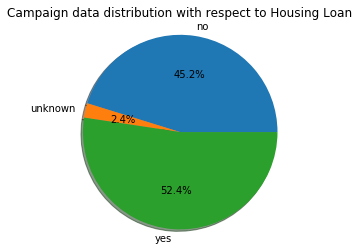

In [7]:
piplot(Bank_data['housing'], "Campaign data distribution with respect to Housing Loan")

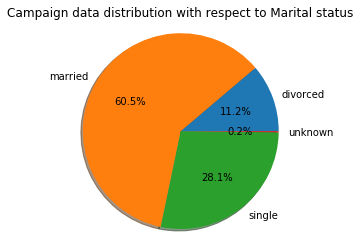

In [8]:
piplot(Bank_data['marital'],"Campaign data distribution with respect to Marital status" )

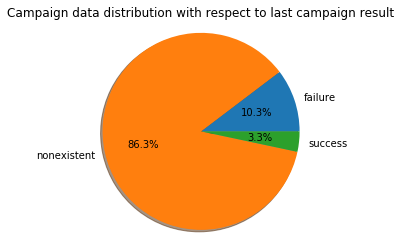

In [9]:
piplot(Bank_data['poutcome'],"Campaign data distribution with respect to last campaign result" )

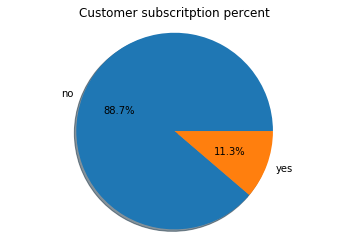

In [66]:
piplot(Bank_data['y'],"Customer subscritption percent" )

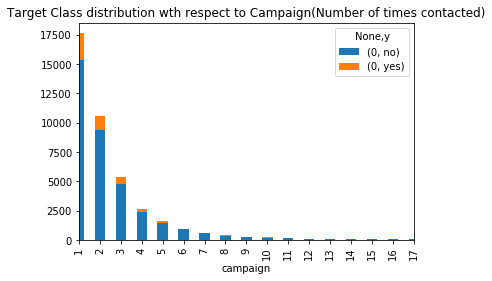

In [10]:
Bank_data.groupby(['campaign','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
plt.xlim(0,16)
plt.title("Target Class distribution wth respect to Campaign(Number of times contacted)")
plt.show()


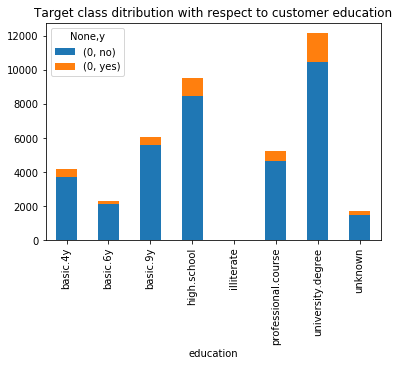

In [11]:
Bank_data.groupby(['education','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class ditribution with respect to customer education")
plt.show()


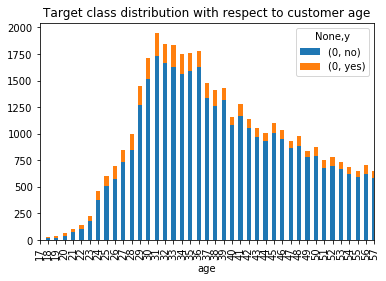

In [12]:
Bank_data.groupby(['age','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
plt.xlim(0,40)
plt.title("Target class distribution with respect to customer age")
plt.show()

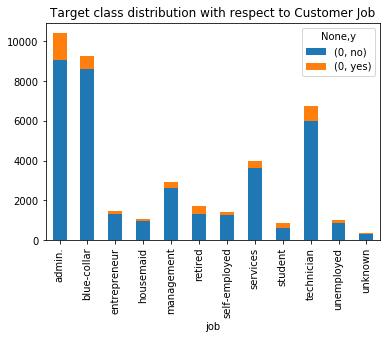

In [13]:
Bank_data.groupby(['job','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class distribution with respect to Customer Job")
plt.show()


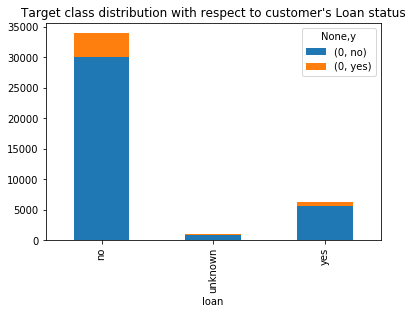

In [14]:
Bank_data.groupby(['loan','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class distribution with respect to customer's Loan status")
plt.show()

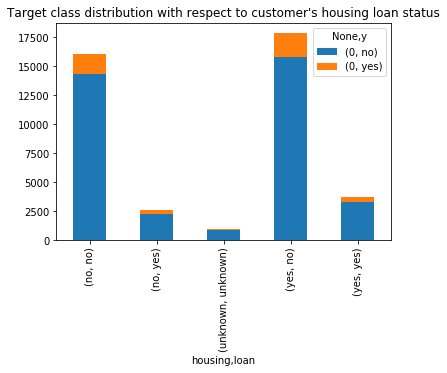

In [15]:
Bank_data.groupby(['housing','loan','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class distribution with respect to customer's housing loan status")
plt.show()

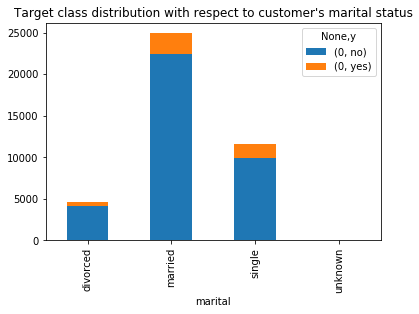

In [16]:
Bank_data.groupby(['marital','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class distribution with respect to customer's marital status")
plt.show()

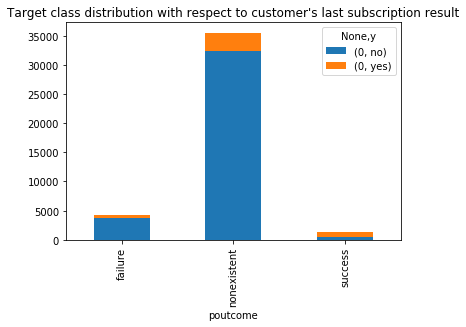

In [17]:
Bank_data.groupby(['poutcome','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,16)
plt.title("Target class distribution with respect to customer's last subscription result")
plt.show()

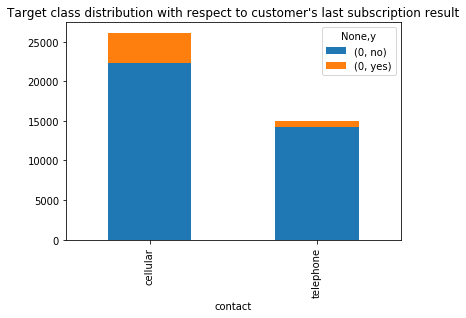

In [18]:
Bank_data.groupby(['contact','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(0,100)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to customer's last subscription result")
plt.show()


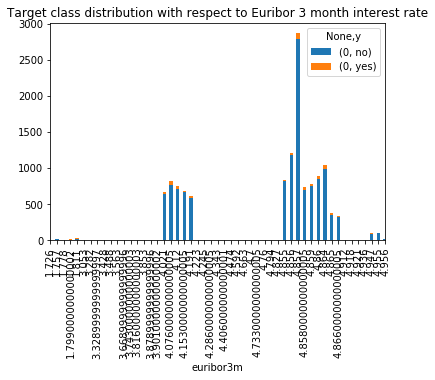

In [79]:
Bank_data.groupby(['euribor3m','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
plt.xlim(250,300)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to Euribor 3 month interest rate")
plt.show()

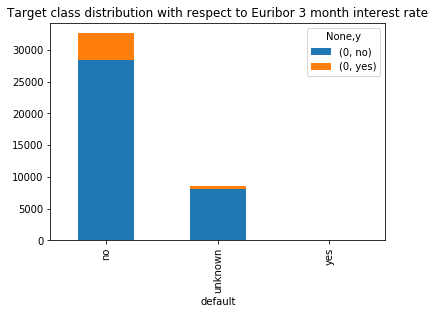

In [94]:
Bank_data.groupby(['default','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(250,300)
#plt.ylim(0,1000)
plt.title("Target class distribution with respect to Euribor 3 month interest rate")
plt.show()

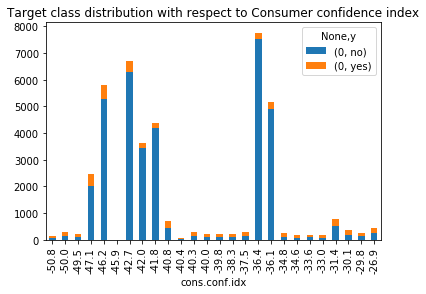

In [81]:
Bank_data.groupby(['cons.conf.idx','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(250,300)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to Consumer confidence index")
plt.show()

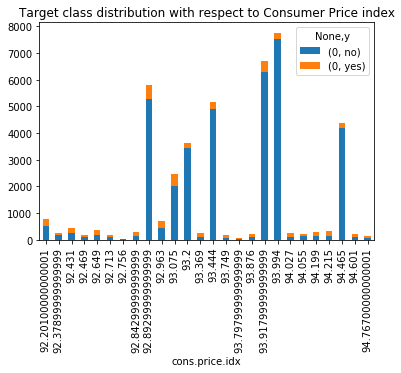

In [82]:
Bank_data.groupby(['cons.price.idx','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(250,300)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to Consumer Price index")
plt.show()

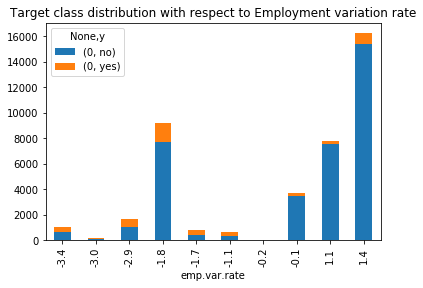

In [83]:
Bank_data.groupby(['emp.var.rate','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(250,300)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to Employment variation rate")
plt.show()

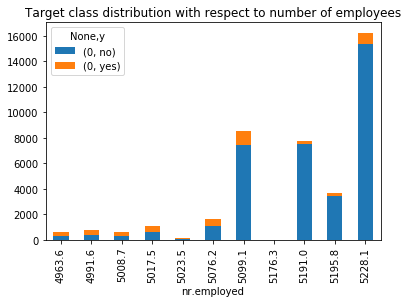

In [84]:
Bank_data.groupby(['nr.employed','y']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.xlim(250,300)
#plt.ylim(0,5000)
plt.title("Target class distribution with respect to number of employees")
plt.show()

## Perform Variable encoding for categorical features

In [19]:
## Convert features to categorical type

Bank_data['job'] = Bank_data['job'].astype('category')
Bank_data['marital'] = Bank_data['marital'].astype('category')
Bank_data['education'] = Bank_data['education'].astype('category')
Bank_data['default'] = Bank_data['default'].astype('category')
Bank_data['housing'] = Bank_data['housing'].astype('category')
Bank_data['loan'] = Bank_data['loan'].astype('category')
Bank_data['contact'] = Bank_data['contact'].astype('category')
Bank_data['month'] = Bank_data['month'].astype('category')
Bank_data['day_of_week'] = Bank_data['day_of_week'].astype('category')
Bank_data['poutcome'] = Bank_data['poutcome'].astype('category')
Bank_data['y'] = Bank_data['y'].astype('category')

Bank_data.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [23]:

Bank_dummy=Bank_data[['job','marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome']]
Bank_dummy=pd.get_dummies(Bank_dummy, columns=['job','marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome'])
Bank_data=Bank_data.drop(['job','marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome'], axis=1)
Bank_data=pd.concat([Bank_data,Bank_dummy], axis=1)
Bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
def getlabels(cat_val):
    le = LabelEncoder()
    le.fit(cat_val)
    y_train_enc = le.transform(cat_val)
    mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
    return y_train_enc

In [35]:

Bank_data['job_new'] = getlabels(Bank_data['job'])
Bank_data['marital_new'] = getlabels(Bank_data['marital'])
Bank_data['education'] = getlabels(Bank_data['education'])
Bank_data['default_new'] = getlabels(Bank_data['default'])
Bank_data['housing_new'] = getlabels(Bank_data['housing'])
Bank_data['loan_new'] = getlabels(Bank_data['loan'])
Bank_data['contact_new'] = getlabels(Bank_data['contact'])
Bank_data['month_new'] = getlabels(Bank_data['month'])
Bank_data['day_of_week_new'] = getlabels(Bank_data['day_of_week'])
Bank_data['poutcome_new'] = getlabels(Bank_data['poutcome'])
Bank_data['y_new'] = getlabels(Bank_data['y'])
Bank_data=Bank_data.drop(['job','marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome','y'], axis=1)
Bank_data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_new,marital_new,default_new,housing_new,loan_new,contact_new,month_new,day_of_week_new,poutcome_new,y_new
0,56,housemaid,married,0,no,no,no,telephone,may,mon,...,3,1,0,0,0,1,6,1,1,0
1,57,services,married,3,unknown,no,no,telephone,may,mon,...,7,1,1,0,0,1,6,1,1,0
2,37,services,married,3,no,yes,no,telephone,may,mon,...,7,1,0,2,0,1,6,1,1,0
3,40,admin.,married,1,no,no,no,telephone,may,mon,...,0,1,0,0,0,1,6,1,1,0
4,56,services,married,3,no,no,yes,telephone,may,mon,...,7,1,0,0,2,1,6,1,1,0
5,45,services,married,2,unknown,no,no,telephone,may,mon,...,7,1,1,0,0,1,6,1,1,0
6,59,admin.,married,5,no,no,no,telephone,may,mon,...,0,1,0,0,0,1,6,1,1,0
7,41,blue-collar,married,7,unknown,no,no,telephone,may,mon,...,1,1,1,0,0,1,6,1,1,0
8,24,technician,single,5,no,yes,no,telephone,may,mon,...,9,2,0,2,0,1,6,1,1,0
9,25,services,single,3,no,yes,no,telephone,may,mon,...,7,2,0,2,0,1,6,1,1,0


## Check correlation between variables

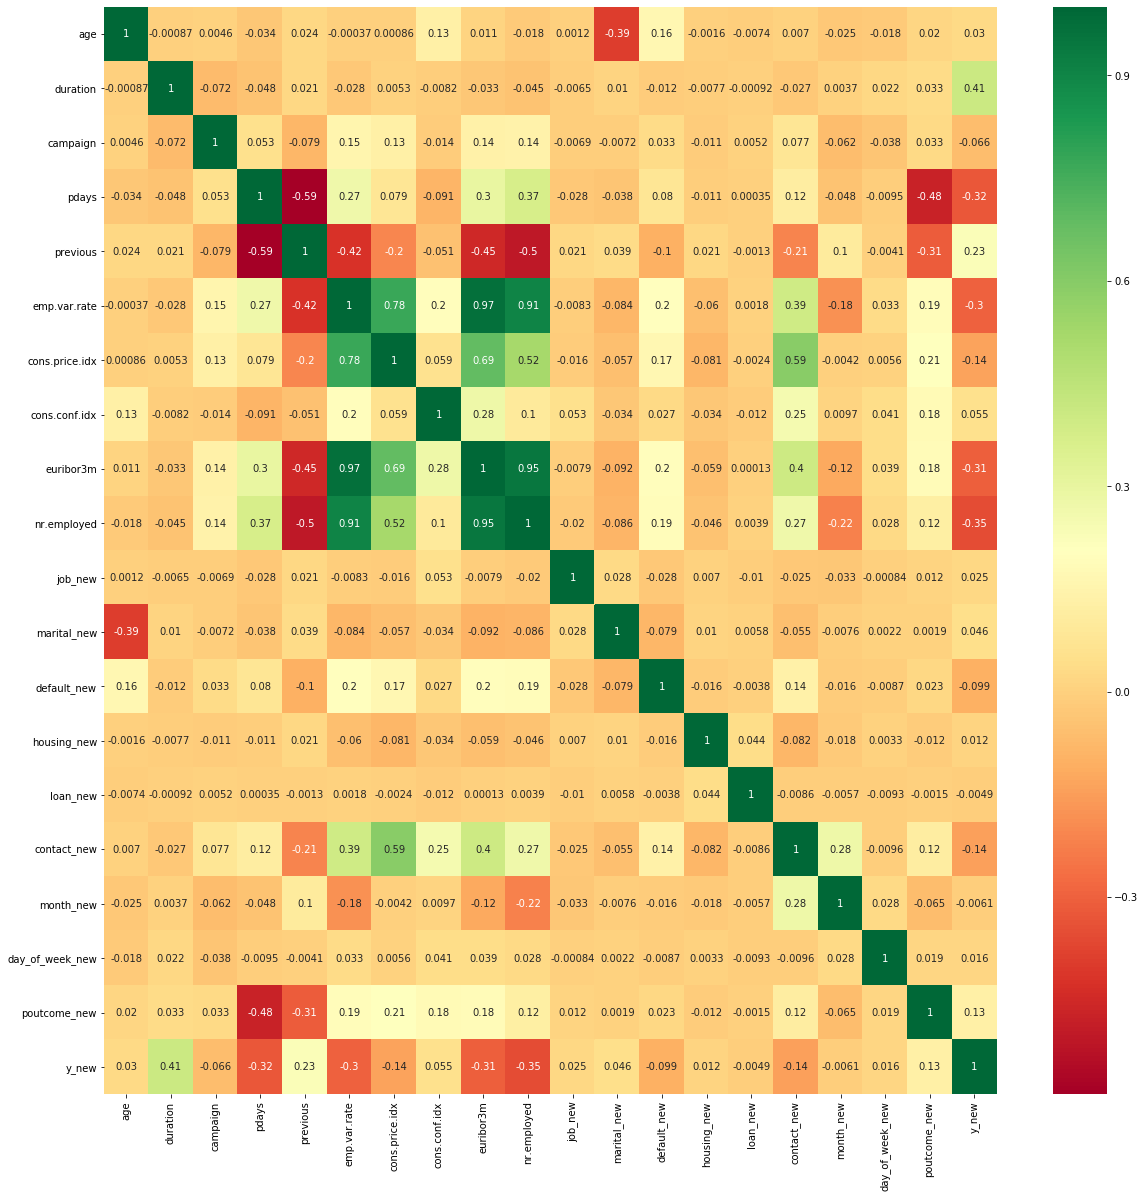

In [37]:
len(Bank_data.columns)

import seaborn as sns
corrmat = Bank_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(Bank_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Define models

In [50]:

def get_traintestset(Bank_data, test_size, random_state):
    X=Bank_data.drop('y', axis=1)
    y=Bank_data['y']

    ######## Split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    #len(X_train), len(X_test), len(y_train), len(y_test)
    return X_train, X_test, y_train, y_test



# feature selector
def select_features1(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# feature selection
def feature_select(X_train, y_train, X_test):
    X_train_fs, X_test_fs, fs = select_features1(X_train, y_train, X_test)

    # scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show(), X_train.columns
    
    
def logisticReg(X_train, y_train, X_test, y_test):
    model = LogisticRegression().fit(X_train, y_train)
    Y_Pred=model.predict(X_test)

    model.score(X_test, y_test)

    #confusion_matrix = confusion_matrix(y_test, Y_Pred,labels=[0,1])
    
    print(classification_report(y_test, Y_Pred))
    print(model.score(X_test, y_test))
    print(pd.crosstab(y_test, Y_Pred))
    
    return model


def XgBoost(X_train, y_train, X_test, y_test, D_train, D_test,param,steps):
    ## Train model
    model = xgb.train(param, D_train, steps)

    preds = model.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
    print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
    print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
    print(pd.crosstab(y_test, best_preds))
    print(classification_report(y_test, best_preds))
    
    return model



def XBClassifier(X_train, y_train, X_test, y_test):
    xgbmodel=XGBClassifier(booster='gbtree',seed=0,nthread=-1,gamma=0,scale_pos_weight=7.88,learning_rate=LR,n_estimators=NumTrees,
                      max_depth=5,objective='binary:logistic',subsample=1)
    xgbmodel.fit(X_train, y_train)
    
    
    

def XgBoost_Gridserach(X_train, y_train, X_test, y_test,cv,parameters):
    classifier = xgb.XGBClassifier()

    Grid_search = GridSearchCV(classifier,parameters, n_jobs=4, scoring="neg_log_loss", cv=cv)

    Grid_search.fit(X_train, y_train)
    print(Grid_search.best_params_)
    y_true, y_pred = y_test, Grid_search.predict(X_test)
    print(pd.crosstab(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return Grid_search, Grid_search.best_params_




def svm_classifier(X_train, y_train, X_test, y_test):
    svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True).fit(X_train, y_train) 
    Y_Pred = svm_model_linear.predict(X_test) 

    print(pd.crosstab(y_test, Y_Pred))
    print(classification_report(y_test, Y_Pred))
    
    return svm_model_linear


def svc_gridsearch(X_train, y_train, X_test, y_test,param_grid):
    grid_SVC = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
    grid_SVC.fit(X_train,y_train)
    print(grid_SVC.best_params_)
    y_true, y_pred = y_test, grid_SVC.predict(X_test)
    print(pd.crosstab(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return grid_SVC, grid_SVC.best_params_





def RF_Classifier(X_train, y_train, X_test, y_test,ns):
    model_rf = RandomForestClassifier(n_estimators=ns, max_features = 'sqrt', n_jobs=-1, verbose = 1)
    model_rf.fit(X_train, y_train)
    Y_Pred=model_rf.predict(X_test)

    print(pd.crosstab(y_test, Y_Pred))
    print(classification_report(y_test, Y_Pred))
    
    return model_rf


def RFC_Gridserach(X_train, y_train, X_test, y_test,param_grid):
    rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 


    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X_train, y_train)
    print(CV_rfc.best_params_)
    Y_Pred=CV_rfc.predict(X_test)

    print(pd.crosstab(y_test, Y_Pred))
    print(classification_report(y_test, Y_Pred))
    
    return CV_rfc, CV_rfc.best_params_



def neuralnetwork(X_train, y_train, X_test, y_test):
    y_train = to_categorical(y_train)
    
    ## keras model
    model = Sequential()
    model.add(Dense(30, input_dim=63, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    ## compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    ## fit the keras model on the dataset
    model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=0)

    ## make class predictions with the model
    predictions = model.predict_classes(X_test)
    print(pd.crosstab(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    return model

## Functions to get results

In [29]:
def get_modelresults(model,X_test, y_test):
    preds = model.predict(X_test)
    print(pd.crosstab(y_test, preds))
    print(classification_report(y_test, preds))
    
def get_roc(model, X_train, y_train, X_test, y_test):
    ytest_probas = model.predict_proba(X_test) 
    ytrain_probas = model.predict_proba(X_train)
    #best_preds = np.asarray([np.argmax(line) for line in y_probas])
    skplt.metrics.plot_roc_curve(y_test, ytest_probas), skplt.metrics.plot_roc_curve(y_train, ytrain_probas)
    plt.show()
    
def get_Calibrated_curve(y_test, Y_Pred):
    fop, mpv = calibration_curve(y_test, Y_Pred, n_bins=10,  normalize=True)
    # plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot model reliability
    plt.plot(mpv, fop, marker='.')
    plt.show()

## Prepare data for model training

In [40]:
# Get train, test sets
X_train, X_test, y_train,y_test = get_traintestset(Bank_data,0.20,40)
y_train=getlabels(y_train)
y_test=getlabels(y_test)

Feature 0: 0.013633
Feature 1: 0.076549
Feature 2: 0.006117
Feature 3: 0.036602
Feature 4: 0.021031
Feature 5: 0.055389
Feature 6: 0.067276
Feature 7: 0.070501
Feature 8: 0.073909
Feature 9: 0.061758
Feature 10: 0.009136
Feature 11: 0.003622
Feature 12: 0.003398
Feature 13: 0.004387
Feature 14: 0.000912
Feature 15: 0.012557
Feature 16: 0.024294
Feature 17: 0.000848
Feature 18: 0.035415


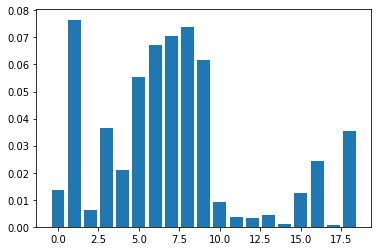

(None,
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
        'job_new', 'marital_new', 'default_new', 'housing_new', 'loan_new',
        'contact_new', 'month_new', 'day_of_week_new', 'poutcome_new'],
       dtype='object'))

In [59]:
## Get importance of features
feature_select(X_train, y_train, X_test), X_train.columns

In [31]:
#Logistic regression and results
log_model=logisticReg(X_train, y_train, X_test, y_test)
ypreds = log_model.predict(X_test)
log_loss(y_test, ypreds, eps=1e-15, normalize=True, sample_weight=None, labels=None)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7250
           1       0.67      0.36      0.47       988

    accuracy                           0.90      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238

0.9025248846807478
col_0     0    1
row_0           
0      7075  175
1       628  360


C:\Users\meera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


3.366688197944109

In [37]:
from xgboost import XGBClassifier
import xgboost as xgb

def XBClassifier(X_train, y_train, X_test, y_test):
    xgbmodel=XGBClassifier(booster='gbtree',seed=0,nthread=-1,gamma=0,scale_pos_weight=7.88,learning_rate=LR,n_estimators=NumTrees,
                      max_depth=12,objective='binary:logistic',subsample=1)
    xgbmodel.fit(X_train, y_train)
    return xgbmodel

 Grid_search = GridSearchCV(classifier,parameters, n_jobs=4, scoring="neg_log_loss", cv=cv)

    Grid_search.fit(X_train, y_train)
   

In [41]:
LR=0.1
NumTrees=100

mod=XBClassifier(X_train, y_train, X_test, y_test)

preds = mod.predict(X_test)
print(pd.crosstab(y_test, preds))
print(classification_report(y_test, preds))
print("Precision = {}".format(precision_score(y_test, preds, average='weighted')))
print("Recall = {}".format(recall_score(y_test, preds, average='weighted')))
print("Accuracy = {}".format(accuracy_score(y_test, preds)))
print("F1Score = {}".format(f1_score(y_test, preds,average='weighted')))

col_0     0    1
row_0           
0      6628  622
1       235  753
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7250
           1       0.55      0.76      0.64       988

    accuracy                           0.90      8238
   macro avg       0.76      0.84      0.79      8238
weighted avg       0.92      0.90      0.90      8238

Precision = 0.9156121915218223
Recall = 0.8959698956057296
Accuracy = 0.8959698956057296
F1Score = 0.9030623215059762


In [126]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [55:17<00:00, 110.58s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.87,0.74,0.74,0.88,0.09
NearestCentroid,0.75,0.74,0.74,0.79,0.06
GaussianNB,0.87,0.74,0.74,0.87,0.08
RandomForestClassifier,0.91,0.74,0.74,0.90,3.11
LGBMClassifier,0.91,0.74,0.74,0.91,0.75
ExtraTreesClassifier,0.90,0.72,0.72,0.90,2.57
XGBClassifier,0.91,0.72,0.72,0.90,3.10
DecisionTreeClassifier,0.89,0.72,0.72,0.88,0.19
Perceptron,0.86,0.71,0.71,0.87,0.10


In [48]:
svmmodel=svm_classifier(X_train, y_train, X_test, y_test)

col_0     0    1
row_0           
0      7092  158
1       682  306
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7250
           1       0.66      0.31      0.42       988

    accuracy                           0.90      8238
   macro avg       0.79      0.64      0.68      8238
weighted avg       0.88      0.90      0.88      8238



In [51]:
param_grid ={'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

svcmodel_GC, bestsv_param=svc_gridsearch(X_train, y_train, X_test, y_test, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1, kernel=linear, total= 1.9min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total= 1.5min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 2.1min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 1.5min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 2.0min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 3.8min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 2.3min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 2.5min
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 45.4min finished


{'C': 10, 'kernel': 'linear'}
col_0     0    1
row_0           
0      6901  349
1       616  372
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7250
           1       0.52      0.38      0.44       988

    accuracy                           0.88      8238
   macro avg       0.72      0.66      0.68      8238
weighted avg       0.87      0.88      0.87      8238



In [52]:
svm_pred = svcmodel_GC.predict(X_test)
print(pd.crosstab(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
print("Precision = {}".format(precision_score(y_test, svm_pred, average='weighted')))
print("Recall = {}".format(recall_score(y_test, svm_pred, average='weighted')))
print("Accuracy = {}".format(accuracy_score(y_test, svm_pred)))
print("F1Score = {}".format(f1_score(y_test, svm_pred,average='weighted')))

col_0     0    1
row_0           
0      6901  349
1       616  372
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7250
           1       0.52      0.38      0.44       988

    accuracy                           0.88      8238
   macro avg       0.72      0.66      0.68      8238
weighted avg       0.87      0.88      0.87      8238

Precision = 0.8698274670839066
Recall = 0.8828599174556931
Accuracy = 0.8828599174556931
F1Score = 0.8747684159721343


In [46]:

ns=50
rfmodel=RF_Classifier(X_train, y_train, X_test, y_test,ns)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


col_0     0    1
row_0           
0      7047  203
1       597  391
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7250
           1       0.66      0.40      0.49       988

    accuracy                           0.90      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.89      0.90      0.89      8238



In [47]:
param_grid = {
    'n_estimators': [10,20,50,200, 700,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_gcmodel, rf_gcbest_param=RFC_Gridserach(X_train, y_train, X_test, y_test,param_grid)

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

{'max_features': 'auto', 'n_estimators': 1000}
col_0     0    1
row_0           
0      7051  199
1       583  405
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7250
           1       0.67      0.41      0.51       988

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.89      0.91      0.89      8238



In [200]:
pp=rfmodel.predict(X_test)
log_loss(y_test, pp, eps=1e-15, normalize=True, sample_weight=None, labels=None)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


3.2367201861542974

In [53]:
nn_model=neuralnetwork(X_train, y_train, X_test, y_test)

col_0     0
row_0      
0      7250
1       988
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7250
           1       0.00      0.00      0.00       988

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.77      0.88      0.82      8238



C:\Users\meera\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
parameters = {"eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,"max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ], "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
cv=5

xgbmodel_GCV, bets_param=XgBoost_Gridserach(X_train, y_train, X_test, y_test,cv,parameters)

In [ ]:
############ Data Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , RandomForestClassifier())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

##GridserachCV 
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)
best_clf.best_params_

pr = best_clf.predict(X_test)
print(pd.crosstab(y_test, preds))
print(classification_report(y_test, pr))
print("Precision = {}".format(precision_score(y_test, pr, average='macro')))
print("Recall = {}".format(recall_score(y_test, pr, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, preds)))
print("F1Score = {}".format(f1_score(y_test, pr,average='weighted')))

## Get ROC Curves for each model

### Logistic regression ROC curve

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


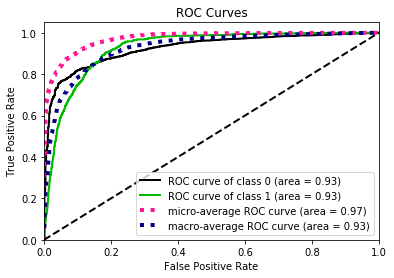

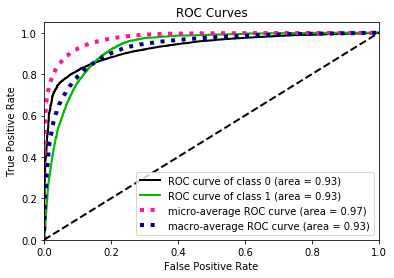

In [54]:
import scikitplot as skplt
get_roc(log_model, X_train, y_train, X_test, y_test) 

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


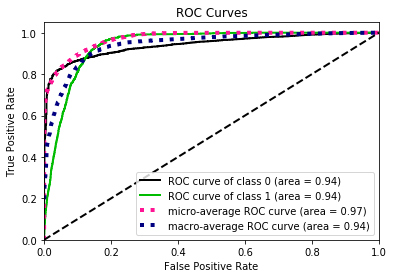

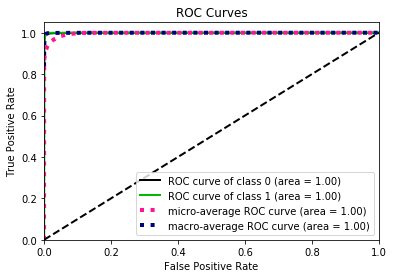

In [55]:
import scikitplot as skplt
get_roc(mod, X_train, y_train, X_test, y_test) 

C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\meera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


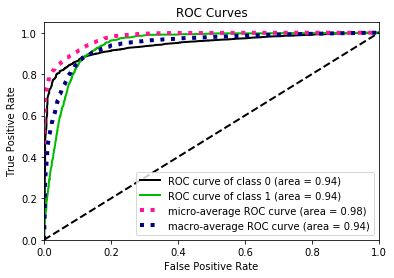

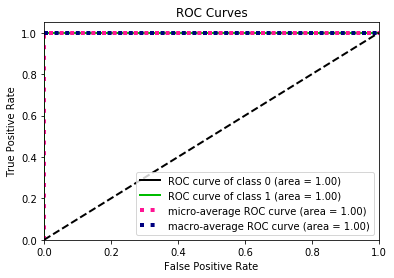

In [56]:
import scikitplot as skplt
get_roc(rf_gcmodel, X_train, y_train, X_test, y_test) 

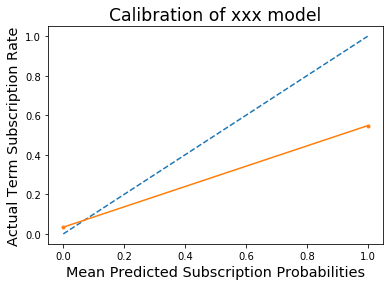

In [62]:
from sklearn.calibration import calibration_curve

fop, mpv = calibration_curve(y_test, preds, n_bins=10,  normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')

# plot model reliability
plt.plot(mpv, fop, marker='.')

plt.ylabel('Actual Term Subscription Rate', fontsize = 'x-large')

plt.xlabel('Mean Predicted Subscription Probabilities', fontsize = 'x-large')

plt.title('Calibration of xxx model', fontsize = 'xx-large')
plt.show()

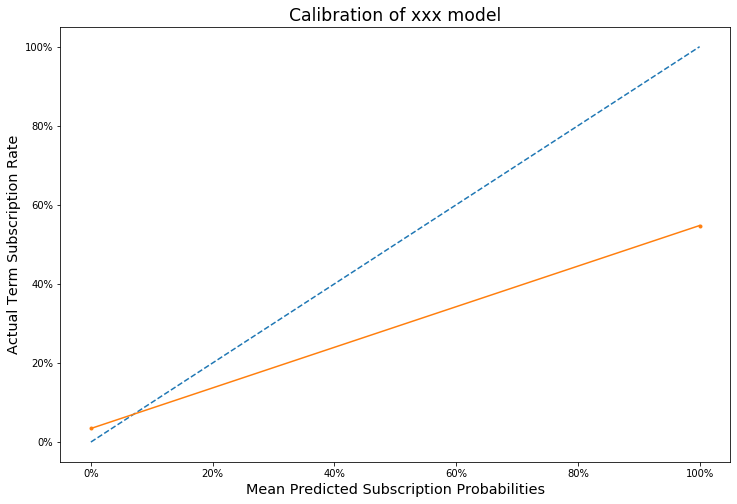

In [65]:
from sklearn.calibration import calibration_curve

from matplotlib import pyplot
import matplotlib.ticker as mtick

fop, mpv = calibration_curve(y_test, preds, n_bins=10, normalize=True)

fig = plt.figure(1, (12,8))

ax = fig.add_subplot(1,1,1)

pyplot.plot([0, 100], [0, 100], linestyle='--')

ax.plot(mpv*100, fop*100, marker='.')

 

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'

 

xticks = mtick.FormatStrFormatter(fmt)

ax.xaxis.set_major_formatter(xticks)

ax.yaxis.set_major_formatter(xticks)

 

plt.ylabel('Actual Term Subscription Rate', fontsize = 'x-large')

plt.xlabel('Mean Predicted Subscription Probabilities', fontsize = 'x-large')

pyplot.title('Calibration of XGBoost model', fontsize = 'xx-large')

pyplot.show()